# k-stat

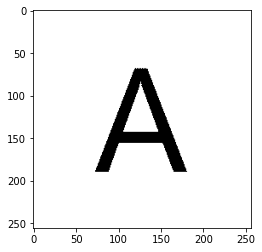

In [23]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray_r")

In [24]:
from optimize import optimize_sa2

K = 10
ks = [i for i in range(2, K + 1)]
result = []
for i in ks:
    result.append(optimize_sa2(k=i,markov=2000, ws=25, wc=1))
    print(f"{i}/{K} done.")

2/10 done.
3/10 done.
4/10 done.
5/10 done.
6/10 done.
7/10 done.
8/10 done.
9/10 done.
10/10 done.


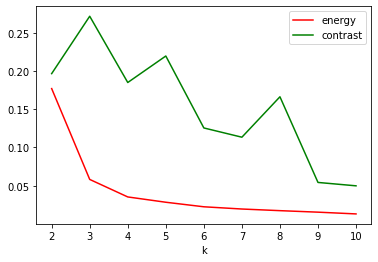

In [25]:
from optimize import energy

plt.xlabel("k")
plt.plot(ks, list(map(lambda x: energy(x.variables, ws=25, wc=1), result)), label="energy", color="red")
plt.plot(ks, list(map(lambda x: x.contrast, result)), label="contrast", color="green")
plt.legend()

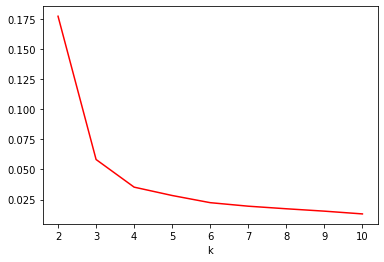

In [26]:
plt.xlabel("k")
plt.plot(ks, list(map(lambda x: energy(x.variables, ws=25, wc=1), result)), label="energy", color="red")


In [27]:
from optimize import safety_penalty_list
import pandas as pd

df = pd.DataFrame({
    "k": ks,
    "contrast": list(map(lambda x: x.contrast, result)),
    "safety": list(map(lambda x: sum(safety_penalty_list(x.variables)), result))
})
df

,k,contrast,safety
0,2,0.196584,0.004419
1,3,0.271628,0.146591
2,4,0.184968,0.169481
3,5,0.219620,0.269463
4,6,0.125535,0.183693
5,7,0.113439,0.192403
6,8,0.166311,0.342620
7,9,0.054286,0.100873
8,10,0.049857,0.111984
